# 3.2　離散確率分布の学習と予測

## 3.2.1　ベルヌーイ分布の学習と予測

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, beta
%matplotlib inline

#学習用データ作成のためのメソッド（Chapter2_Lesson2で実装済み）
def multitrial_bernoulli(mu, n):
    result = []
    for i in range(n):
        result.append(bernoulli.rvs(mu))
    return result

#事後分布の可視化メソッド
def visual_posterior_ber(data, a, b):
    a_ = np.sum(data) + a
    b_ = len(data) - np.sum(data) + b
    x = np.arange(0, 1, 0.001)
    y = beta.pdf(x, a_, b_)
    plt.plot(x, y, label = "$a=$" + str(a) + ", " + "$b=$" + str(b))
    plt.title("Posterior distribution")
    plt.xlabel("$\mu$")
    plt.xlim(0, 1)
    plt.legend()
    
#予測分布の可視化メソッド
def visual_predictive_ber(data, a, b):
    a_ = np.sum(data) + a
    b_ = len(data) - np.sum(data) + b
    x = [0, 1]
    y = bernoulli.pmf(x, a_ / (a_ + b_))
    plt.bar(x, y, label = "$a=$" + str(a) + ", " + "$b=$" + str(b))
    plt.title("Predictive distribution")
    plt.xlabel("x")
    plt.ylabel("probability")
    plt.ylim(0, 1)
    plt.xticks([0, 1])
    plt.legend()

'Trial data' N=20
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]


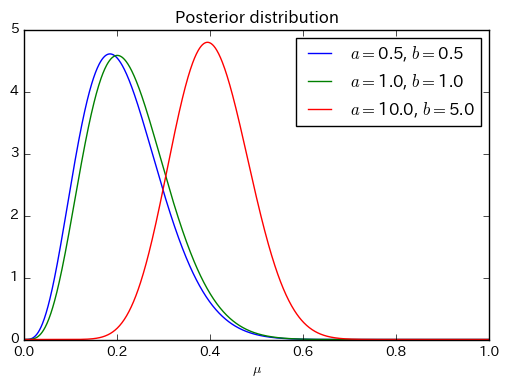

In [11]:
#実行
mu_truth = 0.2
N = 20
data = multitrial_bernoulli(mu_truth, N)
print("'Trial data' N=" + str(N))
print(data)

visual_posterior_ber(data, 0.5, 0.5)
visual_posterior_ber(data, 1.0, 1.0)
visual_posterior_ber(data, 10.0, 5.0)

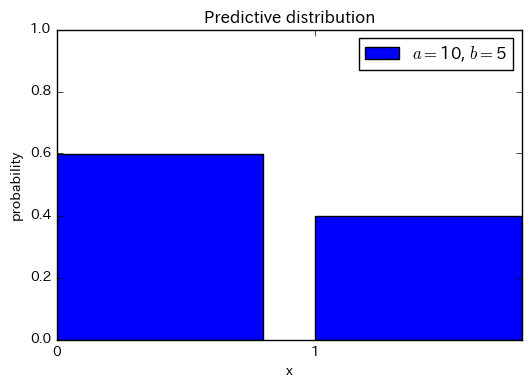

In [12]:
visual_predictive_ber(data, 10, 5)

## 3.2.2　カテゴリ分布の学習と予測

## 3.2.3　ポアソン分布の学習と予測

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.special import gamma
%matplotlib inline

#学習用データ作成のためのメソッド（Chapter2_Lesson2で実装済み）
def multitrial_poisson(mu, n):
    result = []
    for i in range(n):
        result.append(poisson.rvs(mu))
    return result

#事後分布の可視化メソッド
def visual_posterior_poi(data, a, b):
    def gamma_distribution(la, a, b):
        return b**a / gamma(a) * la**(a-1) * np.e**(-b*la)
    a_ = np.sum(data) + a
    b_ = len(data) + b
    x = np.arange(0, 3 * np.mean(data), 0.001)
    y = gamma_distribution(x, a_, b_)
    plt.plot(x, y, label = "$a=$" + str(a) + ", " + "$b=$" + str(b))
    plt.title("Posterior distribution")
    plt.xlabel("$\mu$")
    #plt.xlim(0, 1)
    plt.legend()
    
#予測分布の可視化メソッド
def visual_predictive_poi(data, a, b):
    a_ = np.sum(data) + a
    b_ = len(data) - np.sum(data) + b
    r = a
    p = 1 / (b + 1)
    x = np.arange(0, 16, 1)
    y = (gamma(x + r) / gamma(x+1) / (gamma(r))) * (1 - p) ** r * p ** x
    plt.bar(x, y, label = "$a=$" + str(a) + ", " + "$b=$" + str(b))
    plt.title("Predictive distribution")
    plt.xlabel("x")
    plt.ylabel("probability")
    plt.legend()

'Trial data' N=20 / mean_data = 0.4
[0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]


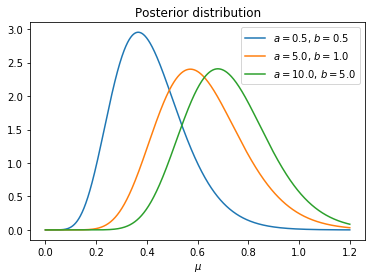

In [14]:
#実行
mu_truth = 0.5
N = 20
data = multitrial_poisson(mu_truth, N)
print("'Trial data' N=" + str(N), "/ mean_data =", np.mean(data))
print(data)

visual_posterior_poi(data, 0.5, 0.5)
visual_posterior_poi(data, 5.0, 1.0)
visual_posterior_poi(data, 10.0, 5.0)

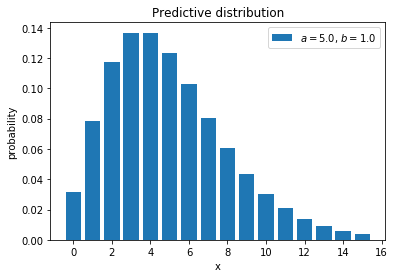

In [15]:
visual_predictive_poi(data, 5.0, 1.0)

In [7]:
gamma(4)

6.0